parse:  /Users/gudmian/Documents/diploma2021/dataset


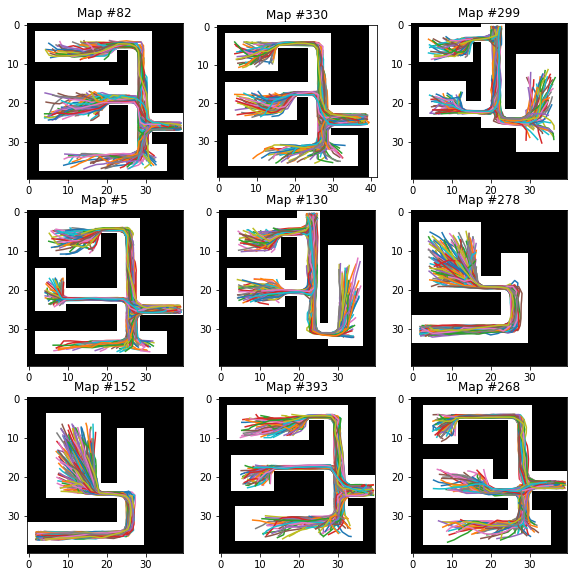

In [1]:
# %matplotlib inline

from parsers import parser
from models.data_unit import DataUnit

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data = parser.parse("/Users/gudmian/Documents/diploma2021/dataset")

def showRandomMapsAndTrajectories(num_of_maps, num_of_trajectories_for_map):
    if num_of_maps > 9: num_of_maps = 9
    
    counter = 1
    size = int(np.ceil(num_of_maps**0.5))
    fig = plt.figure(figsize=(size*3.25, size*3.25))
    
    for row in np.random.randint(400, size=(size, size)):
        for col in row:
            if counter > num_of_maps: continue
            
            ax = fig.add_subplot(size, size, counter)
            
            plt.imshow(np.abs(np.array(data[col].map, dtype='float32') - 1), cmap='gray')
            traj_size = 0
            if num_of_trajectories_for_map >= len(data[col].trajectories):
                traj_size = len(data[col].trajectories) - 1
            else:
                traj_size = num_of_trajectories_for_map
            for i in range(0, traj_size):
                trajs = data[col].trajectories[i]
                plt.plot(trajs.x, trajs.y)
            
            ax.set_title("Map #{}".format(col))
            
            counter += 1
    plt.show()

showRandomMapsAndTrajectories(9, 200)

In [7]:
np.array(data[0].map)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [3]:
import tensorflow as tf

In [8]:
map_arr = np.array([d.map for d in data])
map_arr

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 0, ..., 1, 1, 1],
        [1, 1, 0, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 0, ..., 1, 1, 1],
        [1, 1, 0, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 

0.14956861922263506


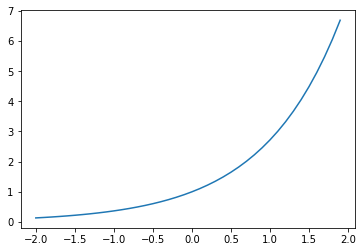

In [37]:
xx = np.arange(-2, 2, 0.1)
yy = np.exp(xx)
plt.plot(xx, yy)
print(yy[1])

In [40]:
from scipy.spatial.distance import directed_hausdorff
def get_hausdorff_matrix(data):
    X_map_arr = [] 
    l = 1
    for i, m_i in enumerate(data):
        X_map_arr.append([])
        for j, m_j in enumerate(data):
            d_1 = directed_hausdorff(m_i, m_j)[0]
            d_2 = directed_hausdorff(m_j, m_i)[0]
            d = (d_1 + d_2)/(2*l)
            s = np.exp(-((d**2)/2))
            X_map_arr[i].append(s)
    return np.array(X_map_arr)
get_hausdorff_matrix(map_arr)

array([[1.        , 0.00940713, 0.0027265 , ..., 0.00453581, 0.00427845,
        0.00364787],
       [0.00940713, 1.        , 0.00609752, ..., 0.22313016, 0.00319145,
        0.00676016],
       [0.0027265 , 0.00609752, 1.        , ..., 0.00218749, 0.00151799,
        0.00193529],
       ...,
       [0.00453581, 0.22313016, 0.00218749, ..., 1.        , 0.00682291,
        0.01968742],
       [0.00427845, 0.00319145, 0.00151799, ..., 0.00682291, 1.        ,
        0.01175189],
       [0.00364787, 0.00676016, 0.00193529, ..., 0.01968742, 0.01175189,
        1.        ]])

In [61]:
x = data[0].trajectories[0].x
y = data[0].trajectories[0].y
print(np.array(x))
print(np.array(y))
T = np.array([(i+1)/len(x) for i, _ in enumerate(x)])
print(T)

[ 4.01  4.59  6.5   8.12  9.8  10.73 12.57 13.9  15.08 17.06 18.84 20.79
 21.67 23.14 24.16 25.78 26.33 28.26 29.17 29.62 30.14 30.19 29.77 29.48
 28.59 27.34 25.92 24.62 23.37 22.69 21.67 21.35 20.87 20.27 19.83 19.46
 18.92 18.63 18.18 18.04]
[32.12 32.19 32.08 32.22 32.26 32.43 32.15 31.32 31.51 31.71 31.74 31.47
 31.53 31.58 31.49 31.48 31.54 31.11 30.12 29.2  27.45 25.92 24.05 22.89
 21.24 20.44 20.41 20.24 18.94 18.39 17.26 16.57 15.22 13.54 11.96 10.92
  9.3   8.1   6.74  5.7 ]
[0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3
 0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6
 0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9
 0.925 0.95  0.975 1.   ]


In [65]:
for i in range(1, 41):
    print(i)
    print(i/len(range(1,41)))

1
0.025
2
0.05
3
0.075
4
0.1
5
0.125
6
0.15
7
0.175
8
0.2
9
0.225
10
0.25
11
0.275
12
0.3
13
0.325
14
0.35
15
0.375
16
0.4
17
0.425
18
0.45
19
0.475
20
0.5
21
0.525
22
0.55
23
0.575
24
0.6
25
0.625
26
0.65
27
0.675
28
0.7
29
0.725
30
0.75
31
0.775
32
0.8
33
0.825
34
0.85
35
0.875
36
0.9
37
0.925
38
0.95
39
0.975
40
1.0
